# ACCRE Project - Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

# Read in fullsample_cleaned.csv as a dataframe
logs = pd.read_csv("../data/logs.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH'])

# Convert DATE column in logs df to datetime type
logs['DATE'] = pd.to_datetime(logs['DATE'])

In [4]:
# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

In [ ]:
jobs['GROUP1H']

## Question 2: What does the completions per hour look like over the time span of the dataset?

## Question 3: Are there weekly trends, and has it been increasing over the last year?

In [36]:
weekly_jobs_ended_by_hour

,END,JOBID,STATE,BEGIN,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,REQMEMTOT,REQMEMPERCORE,GROUP1H
0,2020-10-04,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762,575.029762
1,2020-10-11,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619,1223.422619
2,2020-10-18,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190,673.851190
3,2020-10-25,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381,1457.952381
4,2020-11-01,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524,611.309524
5,2020-11-08,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095,363.738095
6,2020-11-15,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048,756.119048
7,2020-11-22,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905,620.761905
8,2020-11-29,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619,405.672619
9,2020-12-06,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762,1082.279762


In [43]:
jobs.groupby('STATE').nunique()

,JOBID,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,JOBLENGTH,REQMEMTOT,REQMEMPERCORE,GROUP1H
STATE,,,,,,,,,,,,,,,
CANCELLED,9055,4148,5556,130,3319,94,2624,15,23,10,13,2626,129,162,1361
CANCELLED by 0,474,16,16,8,5,8,5,3,6,3,3,5,9,8,9
CANCELLED by 111694,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CANCELLED by 160027,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CANCELLED by 161909,4,4,4,2,3,2,3,2,2,2,3,3,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CANCELLED by 9221,71,58,58,2,1,1,1,1,2,1,2,1,2,2,13
COMPLETED,7375084,697151,4100858,353,999937,421,194086,63,43,18,1,194475,360,545,2289
FAILED,3766,2942,3089,77,1893,64,1368,46,16,6,28,1368,89,96,820


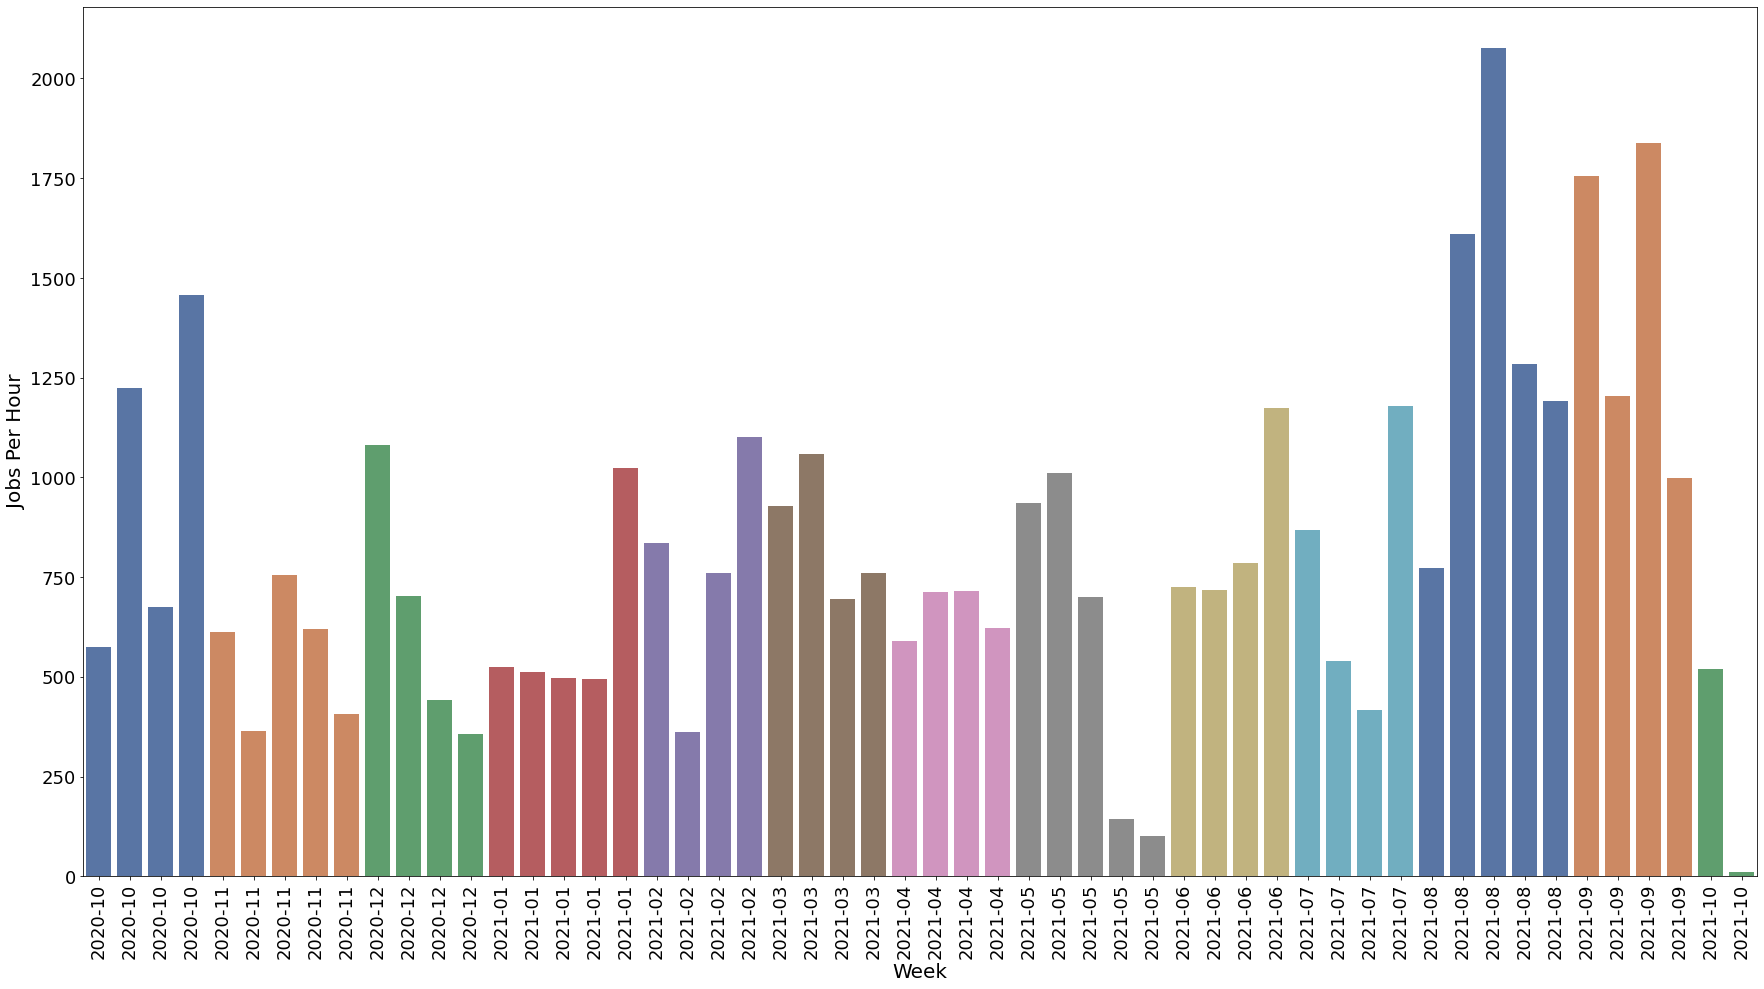

In [45]:
weekly_jobs_ended_by_hour = jobs.groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x='END', y='JOBID', data=weekly_jobs_ended_by_hour, hue=date_labels, dodge=False, palette="deep")

plt.xlabel('Week', fontsize=20)
ax.set_xticklabels(labels=date_labels, rotation=90, fontsize=18)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=18)

ax.get_legend().set_visible(False);

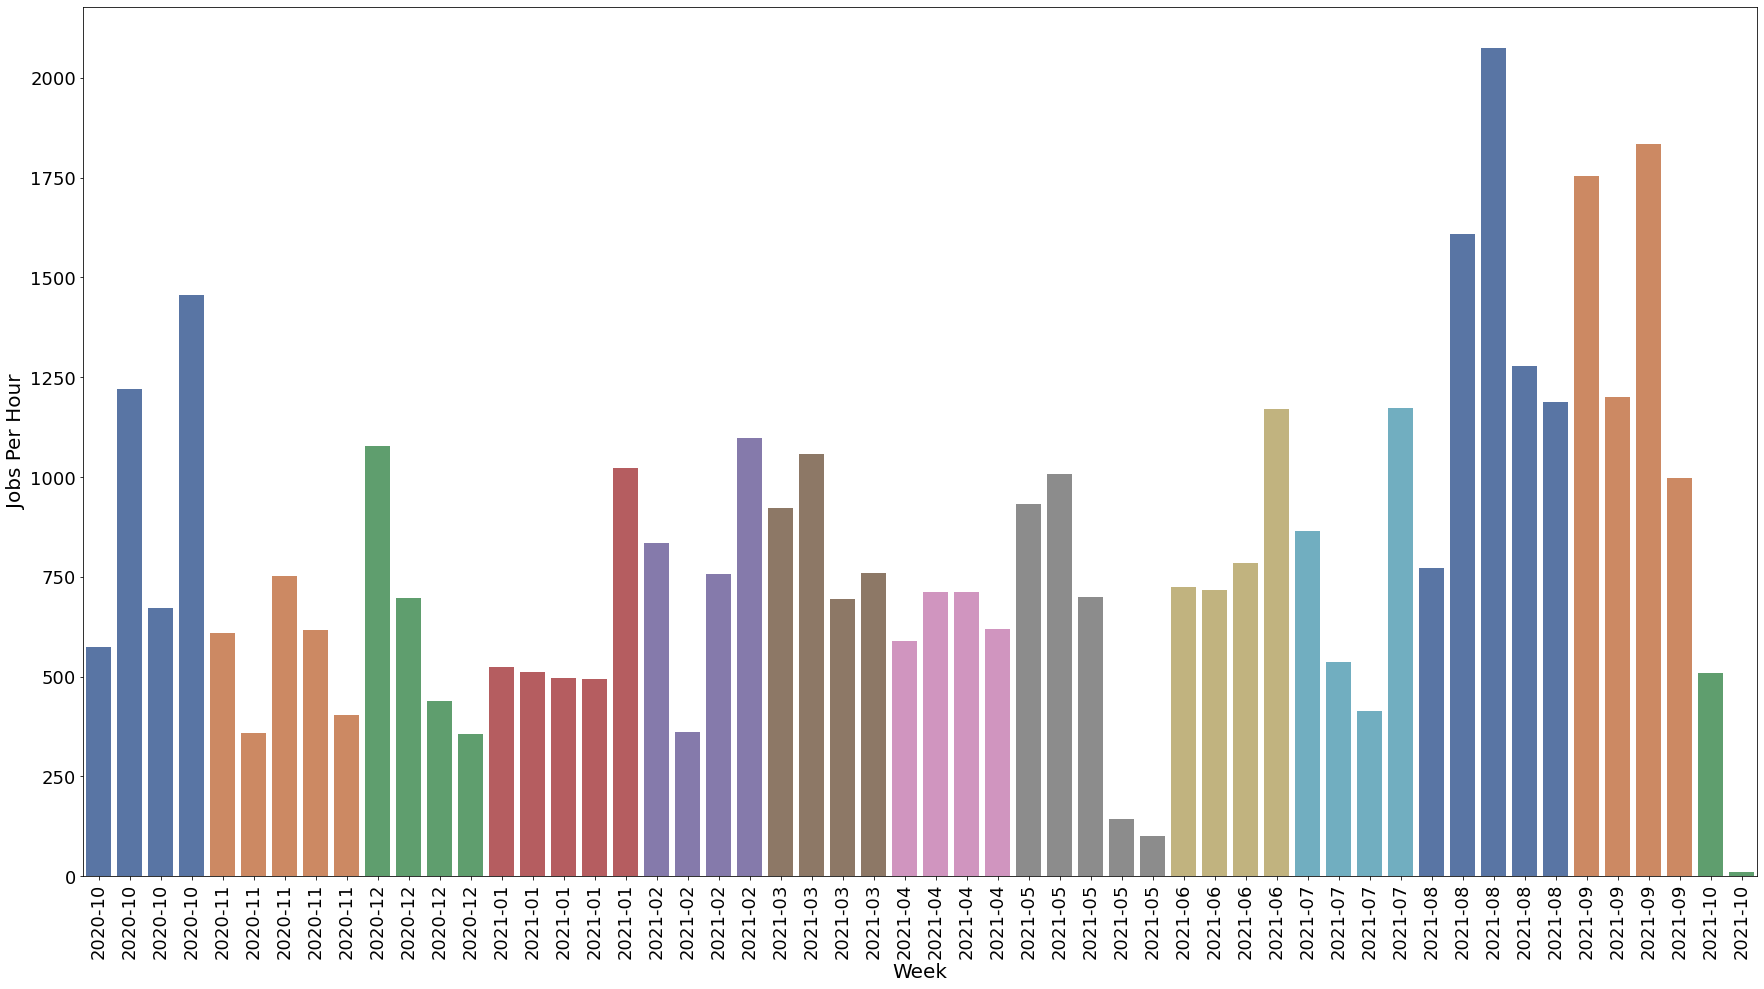

In [37]:
weekly_jobs_ended_by_hour = jobs[jobs['STATE'] == 'COMPLETED'].groupby(pd.Grouper(key='END',freq='W')).count()/168
weekly_jobs_ended_by_hour = weekly_jobs_ended_by_hour.reset_index()
date_labels = weekly_jobs_ended_by_hour['END'].dt.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(30,16))
sns.barplot(x='END', y='JOBID', data=weekly_jobs_ended_by_hour, hue=date_labels, dodge=False, palette="deep")

plt.xlabel('Week', fontsize=20)
ax.set_xticklabels(labels=date_labels, rotation=90, fontsize=18)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=18)

ax.get_legend().set_visible(False);

It seems that the amount of jobs per hour increase in the August to September time frame. Coincidentally this correlates to the beginning of the school year. If we could analyze the data for the rest of 2020, 2019 and 2018, we could test further validate this hypothesis.

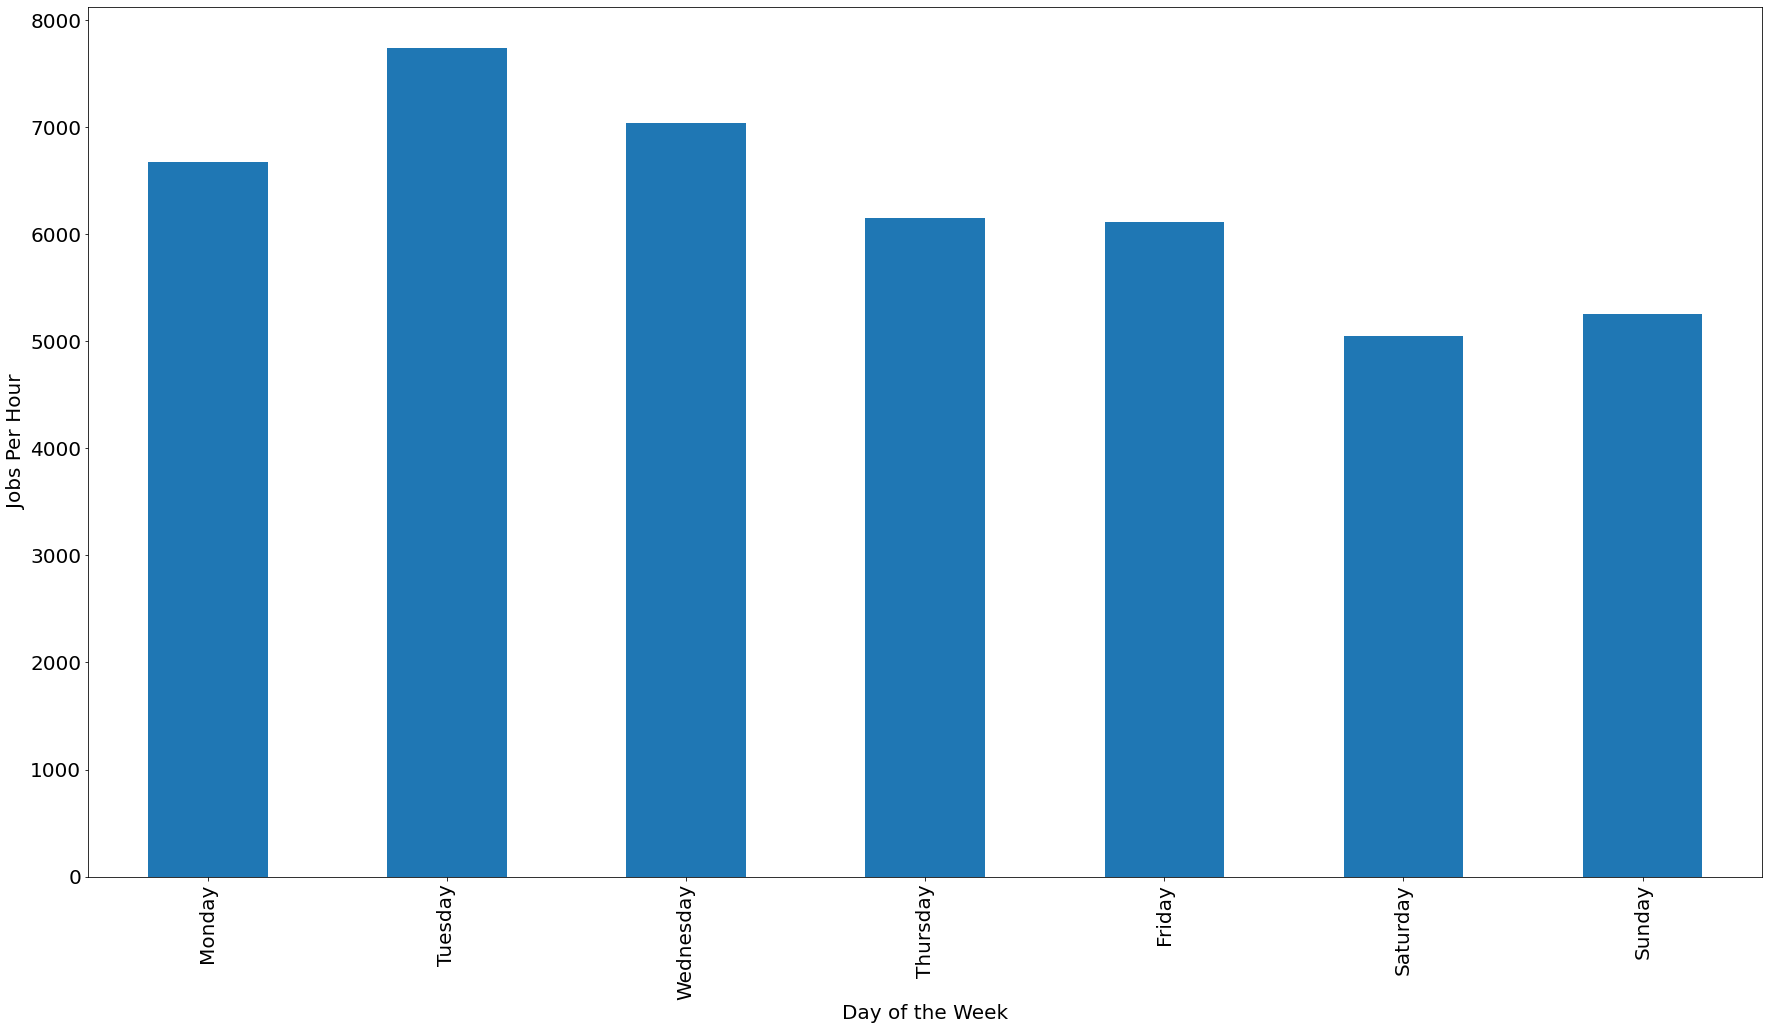

In [6]:
daily_jobs_ended_per_hour = jobs.groupby(jobs['END'].dt.day_name()).count()['JOBID']/168
daily_jobs_ended_per_hour = daily_jobs_ended_per_hour.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

fig, ax = plt.subplots(figsize=(30,16))
daily_jobs_ended_per_hour.plot(kind='bar')

plt.xlabel('Day of the Week', fontsize=20)
day_labels = daily_jobs_ended_per_hour.index
ax.set_xticklabels(labels=day_labels, rotation=90, fontsize=20)

plt.ylabel('Jobs Per Hour', fontsize=20)
plt.yticks(fontsize=20);

On average, it looks like the completed jobs per hour are higher at the beginning of the week (Monday thru Wednesday) and decrease as the week goes on.

## Question 4: Does the job state affect completions per hour? i.e. if I only look at jobs with exit code 0:0 in the "COMPLETED" state, is that a similar number of completions per hour as with all jobs, failed or cancelled? This will indicate if the load on the scheduler is by user design or is a result of users not sufficiently testing their jobs before submitting very large arrays. We also expect that most job completions will be in the "production" partition, but is this actually true?

## Question 5: Calculate some descriptive statistics about how often the scheduler was unresponsive, how long these periods of time were, and create a time series plot of when the scheduler was having difficulties.

In [35]:
logs['TIMELAPS'].str.extract('(\w+\s\d)')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
9547408,NaN
9547409,NaN
9547410,NaN
9547411,NaN


In [31]:
logs

,DATE,USER,RETRY,TIMELAPS,RETURNCODE,COMMAND,SERVERID
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",ce5
...,...,...,...,...,...,...,...
9547408,2021-10-07 21:59:35.014602,user 9221,retry 0,time 0.060086965560913086,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547409,2021-10-07 21:59:35.238970,user 9202,retry 0,time 0.09804415702819824,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547410,2021-10-07 21:59:57.265189,user 9203,retry 0,time 0.02454972267150879,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9547411,2021-10-07 22:00:04.024360,user 9201,retry 0,time 0.03941917419433594,returncode 0,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6


In [24]:
logs[(logs['USER'] == 'user 9204') 
     & (logs['RETURNCODE'] == 'returncode 1')
    & ()]

,DATE,USER,RETRY,TIMELAPS,RETURNCODE,COMMAND,SERVERID
564,2020-10-16 08:59:38.926896,user 9204,retry 0,time 0.1231698989868164,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '...",ce5
565,2020-10-16 08:59:38.986336,user 9204,retry 1,time 0.05905652046203613,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '...",ce5
566,2020-10-16 08:59:39.133897,user 9204,retry 2,time 0.1472628116607666,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '...",ce5
683,2020-10-16 09:11:17.798315,user 9204,retry 0,time 0.02103400230407715,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '...",ce5
684,2020-10-16 09:11:17.817819,user 9204,retry 1,time 0.019124746322631836,returncode 1,"command ['/usr/bin/scontrol', 'show', 'job', '...",ce5
...,...,...,...,...,...,...,...
9507537,2021-10-02 17:58:37.495144,user 9204,retry 0,time 20.930217266082764,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9508221,2021-10-02 19:35:14.969204,user 9204,retry 0,time 20.08076572418213,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-u...",ce6
9508224,2021-10-02 19:35:37.928916,user 9204,retry 0,time 20.04522681236267,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j...",ce6
9508225,2021-10-02 19:35:39.720073,user 9204,retry 1,time 1.790639877319336,returncode 1,"command ['/usr/bin/squeue', '-o', '%i %T', '-j...",ce6


## Question 6: Finally, combine the time series information from the two datasets together to see how well correlated heavy job-completion load is with the unresponsiveness, and to see if there is some threshold of job completions per hour that generally results in unresponsiveness.